# Part B - Question 7

**Supervised Learning Algorithms - Logistic Regression (Univariant):** Implement logistic regression and test it using any dataset which will be given to you. Give new test data and predict the classification output. Handcode the classification probability and compare with the model output. Print the confusion matrix, accuracy, precision, recall, sensitivity, specificity, MCC etc.  Analyze and write the inference.

## Pre-Processing

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot: xlabel='Glucose', ylabel='Outcome'>

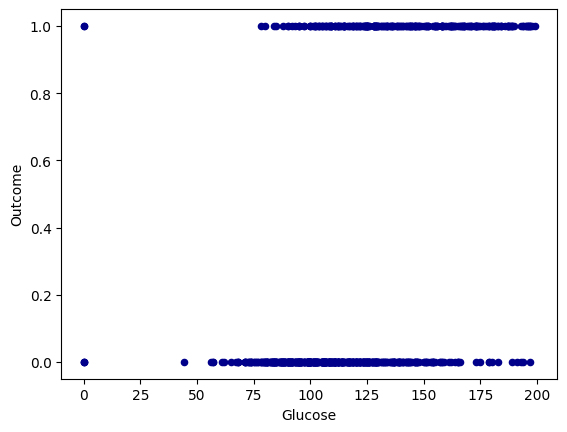

In [16]:
df.dropna(inplace=True)
df.plot.scatter(x=df.columns[1],y=df.columns[8],c='DarkBlue')

In [17]:
X =df.Glucose.values.reshape(-1,1)
Y = df.Outcome.values.reshape(-1,1)


## Training

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

reg = LogisticRegression()
reg.fit(x_train, y_train)

c:\Users\MXNXV-ERR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
y_pred=reg.predict(x_test)

In [21]:
new=reg.predict([[150.0]])
print(new)

[1.]


In [22]:
from sklearn import metrics
cm= metrics.confusion_matrix(y_test, y_pred)
cm

array([[89,  8],
       [24, 28]], dtype=int64)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 23.52222222222222, 'Predicted label')

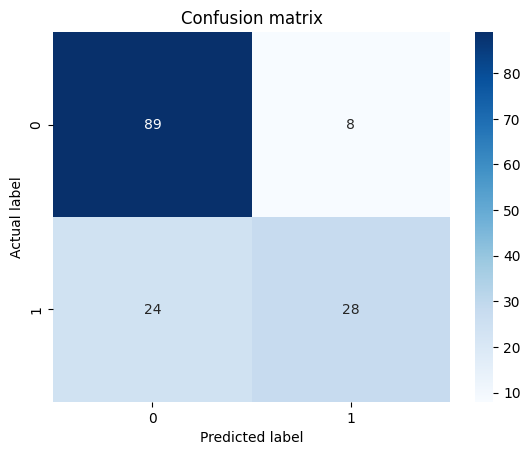

In [30]:
sns.heatmap(data=cm,annot=True,cmap='Blues')
plt.title("Confusion matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
print("\n Precision is", metrics.precision_score(y_test, y_pred, pos_label=1))
print("\n Recall is", metrics.recall_score(y_test, y_pred, pos_label=1))


 Precision is 0.7777777777777778

 Recall is 0.5384615384615384


In [46]:
import numpy as np
from sklearn.metrics import mean_absolute_error,  mean_squared_error
ypred_=reg.predict(x_test)
print("Mean Absolute Error = ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error = ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error = ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error =  0.21476510067114093
Mean Squared Error =  0.21476510067114093
Root Mean Squared Error =  0.4634275570907938


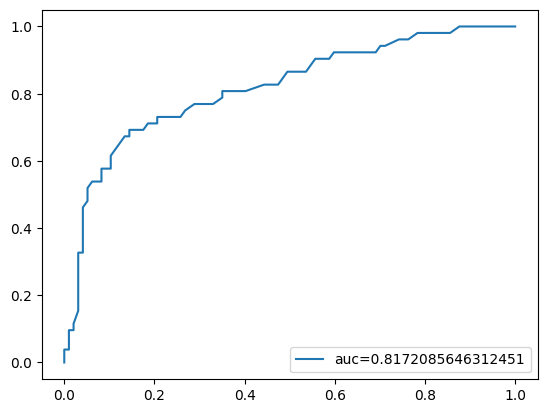

In [52]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = reg.predict_proba(x_test)[::,1]
fpr,tpr,_=roc_curve(y_test,y_pred_prob,pos_label=1)
auc = roc_auc_score(y_test,y_pred_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.785234899328859

## Inference

With an AUC (Area under the curve) of 0.785, a fair classification has been made.

The Mean Absolute Error and Mean Squared Error of 0.214 represents an acceptable model.